<a href="https://colab.research.google.com/github/mandar-solanki/ML_Regression_Methods_Exercise/blob/main/0723_Lab_3_Non_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here’s a **lab question** designed for students to implement **non-linear regression** using real-world **GDP data**. It involves data analysis, curve fitting, and model evaluation using Python.

---

#### **Lab Question: Non-Linear Regression on GDP Growth Data**

#### **Objective**:

Apply non-linear regression techniques to model a country's GDP growth over time using an appropriate curve fitting method (Exponential or Logistic).

---

#### **Question**:

> You are provided with a dataset `gdp.csv` that contains the following columns:
>
> * `Year`: The year of observation
> * `GDP`: Gross Domestic Product of a country (in billion USD)
>
> Your task is to:
>
> 1. Perform **EDA** to understand the trend of GDP over the years.
> 2. Plot the **scatter plot** of GDP vs Year.
> 3. Choose and implement a suitable **non-linear regression model**:
>
>    * Logistic: $GDP = \frac{L}{1 + e^{-k(t - t_0)}}$
>    * OR Exponential: $GDP = a \cdot e^{bt}$
> 4. Fit the model to the data using `curve_fit()` from `scipy.optimize`.
> 5. Plot the fitted curve against the actual data.
> 6. Calculate and display the **R² score** to evaluate your model's accuracy.
> 7. Predict the GDP for the year **2030** using your model.

---

#### **Sample CSV Format** (`gdp.csv`)

| Year | GDP     |
| ---- | ------- |
| 1960 | 543.3   |
| 1970 | 1075.9  |
| 1980 | 2862.5  |
| 1990 | 5979.6  |
| 2000 | 10284.8 |
| 2010 | 14964.4 |
| 2020 | 21143.0 |

---

#### **Expected Output**

* A scatter plot of the GDP trend
* A fitted curve overlayed on the plot
* Printed parameters of the fitted model (e.g., $L, k, t_0$)
* R² score
* Predicted GDP for 2030

---

#### **Hints**:

* Use `matplotlib` or `seaborn` for plotting.
* Use `curve_fit` from `scipy.optimize` to fit your function.
* Use `r2_score` from `sklearn.metrics` for model evaluation.


In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 2. Load the Data
df = pd.read_csv('/content/india_gdp.csv')
df.head()


,Year,GDP
0,1860,410.85
1,1861,382.44
2,1862,128.34
3,1863,171.75
4,1864,296.24


In [ ]:
df.describe()


,Year,GDP
count,166.000000,166.000000
mean,1942.500000,7413.508012
std,48.064193,7520.383889
min,1860.000000,128.340000
25%,1901.250000,1159.737500
50%,1942.500000,4136.875000
75%,1983.750000,12732.840000
max,2025.000000,24656.770000


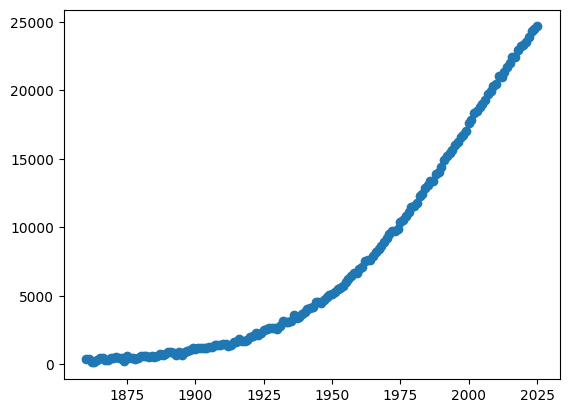

In [ ]:
plt.scatter(df['Year'], df['GDP'])

Fitted Parameters: a=4.4335133565267345e-15, b=0.021372099262778076


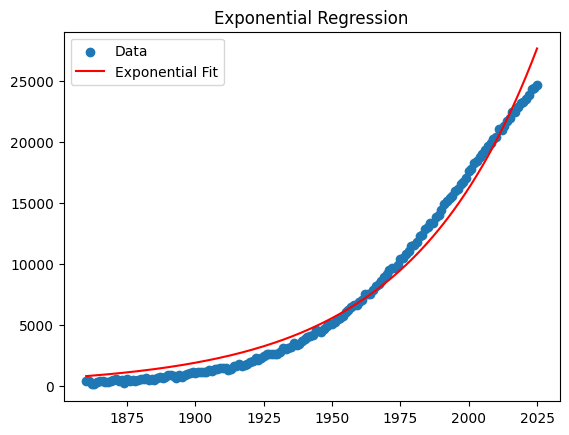

In [ ]:
# Fit Logistic Curve

from scipy.optimize import curve_fit

def exp_func(x, a, b):
        return a * np.exp(b * x)

x = df['Year']
y = df['GDP']

params, _ = curve_fit(exp_func, x, y, p0=(10, 0.02))
a, b = params

print(f"Fitted Parameters: a={a}, b={b}")
y_fit = exp_func(x, a, b)

plt.scatter(x, y, label='Data')
plt.plot(x, y_fit, 'r', label='Exponential Fit')
plt.title("Exponential Regression")
plt.legend()
plt.show()


In [ ]:
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_fit - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_fit - y) ** 2))


Mean absolute error: 818.40
Residual sum of squares (MSE): 862303.03


In [ ]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_fit , y) )


R2-score: 0.98


In [ ]:
print("Predicted GDP for 2030 = %.2f" % exp_func(2030,a,b))


Predicted GDP for 2030 = 30815.63
